Multinomial Naive Bayes

In [ ]:
import csv

def read_file(file_path):
  with open(file_path) as file:
    next(file) # skip the header row
    tsv_file = csv.reader(file, delimiter="\t")

    return [line for line in tsv_file]

def get_useful_data(file_path):
  content = read_file(file_path)

  data = []
  label = []

  # The columns are: order in file | id | tweet | very neg | neg | neutral | positive | strongly pos
  # So we skip the id row, take the tweet as data and take sentiment type with highest score as label
  for line in content:
    data.append(line[2])

    score_list = []
    for i in range(5):
      score_list.append(int(line[i + 3])) # Skip the first 3 entries

    max_score_index = score_list.index(max(score_list))
    label.append(max_score_index)

  return data, label

In [ ]:
train_data, train_label = get_useful_data("cleaned_data_train.tsv")
test_data, test_label = get_useful_data("cleaned_data_test.tsv")
val_data, val_label = get_useful_data("cleaned_data_val.tsv")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

vec = CountVectorizer(stop_words='english')

def run_model(train_data, train_label, test_data, test_label, label_to_text):
  # Vectorize tweet to numbers
  train_x = vec.fit_transform(train_data).toarray()
  test_x = vec.transform(test_data).toarray()

  model = MultinomialNB()
  model.fit(train_x, train_label)

  y_pred = model.predict(test_x)
  acc_score = accuracy_score(test_label, y_pred)
  conf_mat = confusion_matrix(test_label, y_pred)

  print(f"Accuracy {acc_score}")
  
  cmd_obj = ConfusionMatrixDisplay(conf_mat, display_labels=label_to_text) 

  cmd_obj.plot()
  cmd_obj.ax_.set(
                  title='Confusion Matrix', 
                  xlabel=f'Predicted', 
                  ylabel='Actual')  
  plt.show()

  return model, acc_score

In [ ]:
# Reduce the number of label in the list into num_label labels for different test cases
def reduce_label(label_list, num_label: int = 5):
  if num_label == 3:
    return [3 if label > 2 else 2 if label == 2 else 1 for label in label_list]
  elif num_label == 2:
    return [3 if label > 2 else 1 for label in label_list]
  elif num_label == 1:
    print("You must be kidding me")
    return [2 for label in label_list]
    
  return label_list

def execute_run(num_label: int):
  print(f"Running model with {num_label} labels")
  label_to_text = ["Very Negative", "Negative", "Neutral", "Positive", "Strongly Positive"]
  if num_label == 3:
    label_to_text = ["Negative", "Neutral", "Positive"]
  elif num_label == 2:
    label_to_text = ["Negative", "Positive"]
  elif num_label == 1:
    label_to_text = ["Neutral"]

  run_model(train_data, 
            reduce_label(train_label, num_label), 
            test_data, 
            reduce_label(test_label, num_label), 
            label_to_text)
  
  print("\n~~~ End run ~~~\n\n")

Running model with 1 labels
You must be kidding me
You must be kidding me
Accuracy 1.0


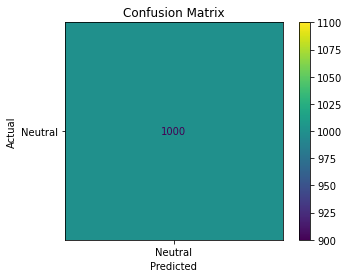


~~~ End run ~~~


Running model with 2 labels
Accuracy 0.802


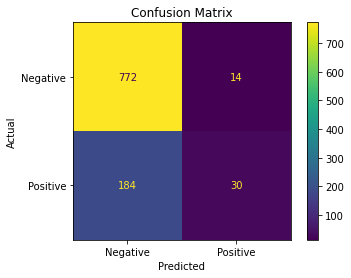


~~~ End run ~~~


Running model with 3 labels
Accuracy 0.636


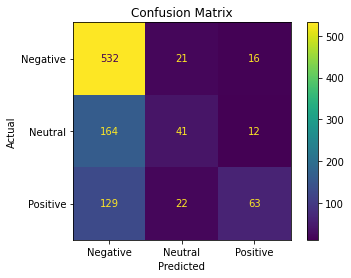


~~~ End run ~~~


Running model with 5 labels
Accuracy 0.484


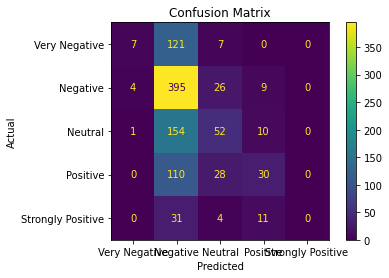


~~~ End run ~~~




In [ ]:
execute_run(1)
execute_run(2)
execute_run(3)
execute_run(5)

Note: some reason why accuracy is too low

* Possibly because data is skewed. Based on the confusion matrix, seems like there aren't a lot of data in the range of Very Negative or positive side
* Naive Bayers is too simple, it doesn't take into account of the context of the words